Definição do potencial de interação entre os átomos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def phi(Z1, Z2, r):
  a0 = 0.529 # Raio de Bohr # angstrom
  a = 0.8854 * a0 /(Z1**0.23 + Z2**0.23) # eV
  c = np.array([0.028171, 0.28022, 0.50986, 0.18175])
  d = np.array([0.20162, 0.40290, 0.94229, 3.1998])

  #phi = np.sum(c*np.exp(-d*r/a))
  phi = 0.0

  for i in range(4):
    phi = phi + c[i]*np.exp(-d[i]*r/a)

  return phi

In [ ]:
Z1 = 6
Z2 = 14
r = 1e8

phi(Z1, Z2, r)

0.0

In [ ]:
r = np.linspace(0, 10, 1001)
pot = []
for rr in r:
  pot.append(phi(Z1, Z2, rr))

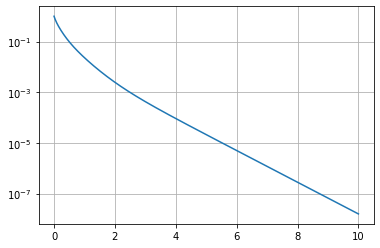

In [ ]:
plt.semilogy(r, pot)
plt.grid()

In [ ]:
def potencial_ZBL(Z1, Z2, r):
  ee = 14.4 # eV. A
  pot = Z1 * Z2 * ee * phi(Z1, Z2, r)/r
  return pot

In [ ]:
r = np.linspace(0, 10, 1001) # erro pois está dividindo por zero
pot = []
for rr in r:
  pot.append(potencial_ZBL(Z1, Z2, rr))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


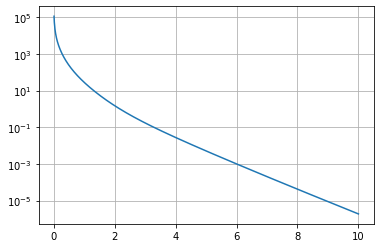

In [ ]:
plt.semilogy(r, pot)
plt.grid()

In [ ]:
def G(Z1, Z2, Er, p, r):
  G = 1 - potencial_ZBL(Z1, Z2, r)/ Er - (p/r)**2
  return G

In [ ]:
'''
Er = 100.0
p = 1
Z1 = 6
Z2 = 14
r = np.linspace(0+1e-5, 10+1e-5, 1001)
GG = []

for rr in r:
  GG.append(G(Z1, Z2, Er, p, rr))
  
plt.plot(r, GG, c = 'r')
plt.xlim([0, 0.006])
plt.ylim([-1e7, 0.2e6])
plt.grid()
'''

"\nEr = 100.0\np = 1\nZ1 = 6\nZ2 = 14\nr = np.linspace(0+1e-5, 10+1e-5, 1001)\nGG = []\n\nfor rr in r:\n  GG.append(G(Z1, Z2, Er, p, rr))\n  \nplt.plot(r, GG, c = 'r')\nplt.xlim([0, 0.006])\nplt.ylim([-1e7, 0.2e6])\nplt.grid()\n"

#Método de Newton

In [ ]:
'''
x_i = 3*p
precision = 1e-5
delta = 1.0
contador = 0
while delta > precision:
  GG = G(Z1, Z2, Er, p, x_i)
  Del_G = dG(Z1, Z2, Er, p, x_i)
  print(contador, x_i)

  x_next = x_i - GG/Del_G
  delta = abs(x_next - x_i)
  x_i = x_next
  contador = contador + 1
R_max = x_i
print( "Distância de aproximação máxima: ", R_max)
'''

'\nx_i = 3*p\nprecision = 1e-5\ndelta = 1.0\ncontador = 0\nwhile delta > precision:\n  GG = G(Z1, Z2, Er, p, x_i)\n  Del_G = dG(Z1, Z2, Er, p, x_i)\n  print(contador, x_i)\n\n  x_next = x_i - GG/Del_G\n  delta = abs(x_next - x_i)\n  x_i = x_next\n  contador = contador + 1\nR_max = x_i\nprint( "Distância de aproximação máxima: ", R_max)\n'